## Lingüística Computacional: Sails :)

## Tarea computacional!
### Distancias de Hamming para lenguas de Sudamérica

1. **Elegir 5 rasgos de Sails.** Descargue los datos en formato txt. La selección debe ser coherente con el fin de facilitar la interpretación de los resultados.
2. Lea los 5 archivos mediante **Pandas**. Con esta información, **construya un diccionario de rasgos.** Si el mismo procedimiento desarrollado en este notebook.
3. Elija **una lengua** para comparar.
4. Calcule **distancias de Hamming** entre **la lengua elegida y todas las demás.** Ordene las distancias de forma creciente. 
5. **Concluya** acerca de sus resultados. 
6. Entregue un **notebook** con sus cálculos. Trate de explicar muy bien tanto los pasos de análisis como las conclusiones finales. 

## 1. Leemos los archivos

In [174]:
import pandas as pd

In [175]:
import glob as glob
### leemos los archivos .txt de la carpeta
archivos_txt = glob.glob('*.txt')
archivos = {fp.replace('.txt',''):pd.read_csv(fp, sep='\t') for fp in archivos_txt}

In [176]:
for rasgo in archivos.keys():
    print(archivos[rasgo])

   iso-639-3                  name value description   latitude  longitude  \
0        agr              Aguaruna     1        true  -5.300440 -77.921790   
1        apy                Apalaí     1        true   1.497920 -54.745700   
2        apu               Apurinã     1        true  -8.216920 -66.771410   
3        arh               Arhuaco     1        true  10.701840 -73.636290   
4        kwi          Awa-Cuaiquer     0       false   1.216525 -78.340135   
..       ...                   ...   ...         ...        ...        ...   
90       mtp  Wichí Lhamtés Nocten     1        true -21.987995 -63.597110   
91       xav               Xavánte     1        true -14.301730 -52.436690   
92       yaa             Yaminahua     1        true  -9.884597 -71.596433   
93       ame              Yanesha'     1        true -10.545390 -75.314970   
94       yuz              Yuracaré     1        true -16.747880 -65.122410   

              family  
0            Chicham  
1            Cari

In [177]:
archivos.keys()

dict_keys(['argex10-1', 'argex11-1', 'argex11-2', 'argex11-3', 'argex11-4'])

## 2. Creamos diccionarios de rasgos

In [178]:
### creamos diccionarios donde los keys son los rasgos y cada value es otro diccionario 
### en el que se encuentran la lemgua y el valor.
## creamos el diccionario "diccionario"
diccionarios = {}
## recorremos archivos.keys
for rasgo in archivos.keys():
    diccionario_rasgo = archivos[rasgo]
    ### iteramos 'name' y  'value' mediante la función zip, se convierten a diccionarion mediante dic
    ### guardamos en nombre valor
    nombre_valor = dict(zip(diccionario_rasgo['name'],diccionario_rasgo['value']))
    ## guardamos en diccionarios[rasgos]
    diccionarios[rasgo] = nombre_valor

In [179]:
diccionarios.keys()

dict_keys(['argex10-1', 'argex11-1', 'argex11-2', 'argex11-3', 'argex11-4'])

In [180]:
diccionarios['argex10-1']

{'Aguaruna': '1',
 'Apalaí': '1',
 'Apurinã': '1',
 'Arhuaco': '1',
 'Awa-Cuaiquer': '0',
 'Awetí': '1',
 'Ayacucho Quechua': '1',
 'Baure': '1',
 'Bora': '1',
 'Bororo': '0',
 'Cajamarca Quechua': '1',
 'Callawalla': '1',
 'Canela': '0',
 'Cavineña': '1',
 'Central Aymara': '1',
 'Chimila': '?',
 'Chipaya': '1',
 'Cholón': '1',
 'Cocama-Cocamilla': '0',
 'Cubeo': '?',
 'Cusco Quechua': '1',
 'Desano': '0',
 'Dâw': '0',
 'Emerillon': '1',
 'Gavião Do Jiparaná': '?',
 'Guató': '?',
 'Hixkaryána': '1',
 'Huallaga Huánuco Quechua': '1',
 'Huangascar-Topara-Yauyos Quechua': '1',
 'Huaylas Ancash Quechua': '1',
 'Hupdë': '1',
 'Ikpeng': '1',
 'Imbabura Highland Quichua': '1',
 'Inga': '1',
 'Itonama': '1',
 'Jamamadí': '0',
 'Jaqaru': '1',
 'Jauja Wanca Quechua': '1',
 'Jurúna': '1',
 'Kamayurá': '1',
 'Kanoê': '?',
 'Karitiâna': '0',
 'Karo (Brazil)': '1',
 'Katukína-Kanamarí': '1',
 'Kwaza': '1',
 'Lakondê': '1',
 'Leco': '0',
 'Lokono': '1',
 'Makuráp': '?',
 'Mapudungun': '1',
 'Matsés'

In [181]:
## juntamos todas las lenguas en un diccionario cuyos keys son los nombres de las lenguas y los values están vacíos
rasgos = {}
### recorremos los rasgos en el diccionario "principal"
for rasgo in diccionarios.keys():
    lenguas = list(diccionarios[rasgo].keys())
    for lengua in lenguas:
        rasgos[lengua] = {}

In [182]:
### número de lenguas
len(rasgos)

95

In [183]:
rasgos

{'Aguaruna': {},
 'Apalaí': {},
 'Apurinã': {},
 'Arhuaco': {},
 'Awa-Cuaiquer': {},
 'Awetí': {},
 'Ayacucho Quechua': {},
 'Baure': {},
 'Bora': {},
 'Bororo': {},
 'Cajamarca Quechua': {},
 'Callawalla': {},
 'Canela': {},
 'Cavineña': {},
 'Central Aymara': {},
 'Chimila': {},
 'Chipaya': {},
 'Cholón': {},
 'Cocama-Cocamilla': {},
 'Cubeo': {},
 'Cusco Quechua': {},
 'Desano': {},
 'Dâw': {},
 'Emerillon': {},
 'Gavião Do Jiparaná': {},
 'Guató': {},
 'Hixkaryána': {},
 'Huallaga Huánuco Quechua': {},
 'Huangascar-Topara-Yauyos Quechua': {},
 'Huaylas Ancash Quechua': {},
 'Hupdë': {},
 'Ikpeng': {},
 'Imbabura Highland Quichua': {},
 'Inga': {},
 'Itonama': {},
 'Jamamadí': {},
 'Jaqaru': {},
 'Jauja Wanca Quechua': {},
 'Jurúna': {},
 'Kamayurá': {},
 'Kanoê': {},
 'Karitiâna': {},
 'Karo (Brazil)': {},
 'Katukína-Kanamarí': {},
 'Kwaza': {},
 'Lakondê': {},
 'Leco': {},
 'Lokono': {},
 'Makuráp': {},
 'Mapudungun': {},
 'Matsés': {},
 'Mochica': {},
 'Mocoví': {},
 'Mosetén': {

In [184]:
### recorremos los cinco rasgos del diccionario "principal"
for rasgo in diccionarios.keys():
    ### recorremos las lenguas del diccionario "secundario" creado en la linea anterior
    for lengua in rasgos.keys():
        ### si la lengua está en ese rasgo en particular, la guardarmos
        if lengua in diccionarios[rasgo].keys():
            ### ingresamos al diccionario "principal" [rasgos][lengua] y guardamos de manera inversa en
            ### el diccionario vacío "secundario" 
            rasgos[lengua][rasgo]=diccionarios[rasgo][lengua]

In [185]:
rasgos

{'Aguaruna': {'argex10-1': '1',
  'argex11-1': '1',
  'argex11-2': '0',
  'argex11-3': 'C',
  'argex11-4': '0'},
 'Apalaí': {'argex10-1': '1',
  'argex11-1': '1',
  'argex11-2': '0',
  'argex11-3': '?',
  'argex11-4': '1'},
 'Apurinã': {'argex10-1': '1',
  'argex11-1': '1',
  'argex11-2': '0',
  'argex11-3': 'C',
  'argex11-4': '0'},
 'Arhuaco': {'argex10-1': '1',
  'argex11-1': '1',
  'argex11-2': '0',
  'argex11-3': 'C',
  'argex11-4': '1'},
 'Awa-Cuaiquer': {'argex10-1': '0',
  'argex11-1': '0',
  'argex11-2': '0',
  'argex11-3': 'C',
  'argex11-4': '0'},
 'Awetí': {'argex10-1': '1',
  'argex11-1': '1',
  'argex11-2': '0',
  'argex11-3': 'C',
  'argex11-4': '0'},
 'Ayacucho Quechua': {'argex10-1': '1',
  'argex11-1': '1',
  'argex11-2': '0',
  'argex11-3': 'C',
  'argex11-4': '0'},
 'Baure': {'argex10-1': '1',
  'argex11-1': '1',
  'argex11-2': '0',
  'argex11-3': 'C',
  'argex11-4': '0'},
 'Bora': {'argex10-1': '1',
  'argex11-1': '1',
  'argex11-2': '0',
  'argex11-3': 'C',
  'arg

In [186]:
rasgos['Shipibo-Conibo']

{'argex10-1': '1',
 'argex11-1': '1',
 'argex11-2': '0',
 'argex11-3': 'C',
 'argex11-4': '0'}

In [187]:
rasgos['Matsés']

{'argex10-1': '1',
 'argex11-1': '1',
 'argex11-2': '0',
 'argex11-3': 'C',
 'argex11-4': '0'}

In [188]:
## distancia de Hamming!

def hamming(nombre1,nombre2):
    ## número de rasgos en que las lenguas difieren
    d = 0
    ## número total de rasgos en común
    n = 0
    ## accedemos a los diccionarios de rasgos
    lengua1 = rasgos[nombre1]
    lengua2 = rasgos[nombre2]
    ## contamos con un ciclo for
    for rasgo in lengua1.keys():
        ## nos preguntamos si rasgo pertenece a ambas lenguas
        if rasgo in lengua2.keys():
            ## revisamos si poseen valores distintos
            if lengua1[rasgo] != lengua2[rasgo]:
                ## en este caso sumamos 1 a d
                d += 1.0
            ## número total de rasgos
            n += 1.0
    ## entregamos la división entre el número rasgos en que las lenguas difieren y el número total de rasgos comunes
    return d/n

## 3. Distancias

In [223]:
hamming('Shipibo-Conibo','Matsés')

0.0

In [224]:
hamming('Shipibo-Conibo',"Yanesha'")

0.0

In [225]:
hamming('Matsés','Tariana')

0.2

In [226]:
lengua_comp = 'Shipibo-Conibo'

In [227]:
distancias = {}

In [228]:
for lengua in rasgos.keys():
    distancias[lengua]=hamming(lengua_comp,lengua)

In [229]:
### ordenamos los resultados de las distancias 
distancias_ordenadas = dict(sorted(distancias.items(), key=lambda item: item[1]))

In [230]:
distancias_ordenadas

{'Aguaruna': 0.0,
 'Apurinã': 0.0,
 'Awetí': 0.0,
 'Ayacucho Quechua': 0.0,
 'Baure': 0.0,
 'Bora': 0.0,
 'Cajamarca Quechua': 0.0,
 'Chipaya': 0.0,
 'Cusco Quechua': 0.0,
 'Huallaga Huánuco Quechua': 0.0,
 'Huangascar-Topara-Yauyos Quechua': 0.0,
 'Huaylas Ancash Quechua': 0.0,
 'Hupdë': 0.0,
 'Jauja Wanca Quechua': 0.0,
 'Kamayurá': 0.0,
 'Karo (Brazil)': 0.0,
 'Matsés': 0.0,
 'Mocoví': 0.0,
 'North Junín Quechua': 0.0,
 'Pacaraos Quechua': 0.0,
 'Parecís': 0.0,
 'Pilagá': 0.0,
 'Rikbaktsa': 0.0,
 'Salasaca Highland Quichua': 0.0,
 'San Martín Quechua': 0.0,
 'Santiago del Estero Quichua': 0.0,
 'Shipibo-Conibo': 0.0,
 'South Bolivian Quechua': 0.0,
 'Southern Pastaza Quechua': 0.0,
 'Tena Lowland Quichua': 0.0,
 'Yaminahua': 0.0,
 "Yanesha'": 0.0,
 'Arhuaco': 0.2,
 'Callawalla': 0.2,
 'Cavineña': 0.2,
 'Central Aymara': 0.2,
 'Cholón': 0.2,
 'Dâw': 0.2,
 'Emerillon': 0.2,
 'Hixkaryána': 0.2,
 'Imbabura Highland Quichua': 0.2,
 'Inga': 0.2,
 'Itonama': 0.2,
 'Jaqaru': 0.2,
 'Kwaza': 

In [231]:
#distancia_0= {valor: [0.0] for valor in set(distancias_ordenadas.values())}

In [232]:
#distancia_0 = []
#for valor in distancias_ordenadas.values():
 #   if valor['value'] != 0.0:
  #      distancia_0 = [valor] + 1
    

In [233]:
#distancia_0

# Conclusiones

Los rasgos elegidos en Sails fueron aquellos que disminuyen la valencia gramatical, específicamente, la marcación para la formación de construcciones reflexivas y recíprocas. Estas construcciones tienden a "fusionar" al participante que controla y al participante que es afectado; es decir, A y P referencialmente son la misma entidad.  

Estos rasgos se encuentran en Sails clasificados según la manera en la que son marcados en las lenguas: marcados morfológicamente (argex11-1; argex10-1); marcados con una partícula especializada para recíprocos (argex11-2); con un pronombre recíproco independiente (argex11-3); y donde la marcación para recíprocos y reflexivos se encuentran morfológicamente fusionados (argex11-4). 

Entonces, en base al shipibo-konibo como lengua base para comparar, la distancia hamming entre este y la mayoría de lenguas que pertenecen a la familia Pano-Tacana que se encuentran en la base de datos de Sails: 'Matsés' y 'Yaminahua' son de 0.0; no obstante, difiere de una lengua pano (Cavineña) en 1 rasgo, distancia hamming = 0.2.

Asimismo, los resultados de las distancias 0.0 en las lenguas que pertenecen a las familias lingüísticas quechua y arawak muestran que la marcación para la formación de construcciones recíprocas y reflexivas en estas familias es similar: se realizan mediante la morfología verbal. Además, de acuerdo al gráfico (2) notamos que la mayoría de lenguas presentan una distancia hamming 0.0, lo cual indica que hay una mayor marcación del reflexivo y recíproco en la morfología verbal de manera independiente. 

## 4. Visualización 

In [234]:
#import matplotlib.pyplot as plt

#fig, ax = plt.subplots(dpi=800)

#ax.plot(range(len(distancias_ordenadas)),distancias_ordenadas.values(),marker='o',color='blue',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full')

#plt.xlabel(r'distancia de Hamming',fontsize=10)
#plt.ylabel(r'número de lenguas',fontsize=10)
#plt.rcParams.update({'font.size': 10})
#plt.savefig('distancias.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
#plt.show()

## 5. Visualización 1 
### Gráfico (1)

In [235]:
lenguajes = pd.read_csv('languages.csv', sep=',')

In [236]:
lenguajes

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family_Glottocode,Family_Name,Status,Parent_Glottocode
0,guri1248,Guriaso,Papunesia,-3.571800,141.597000,guri1248,grx,NaN,NaN,shifting,NaN
1,pawa1255,Pawaia,Papunesia,-6.880210,145.081000,pawa1255,pwa,NaN,NaN,shifting,NaN
2,guam1236,Guamo,South America,8.235103,-67.401875,guam1236,NaN,NaN,NaN,extinct,NaN
3,dama1272,Damal,Papunesia,-4.173450,137.496000,dama1272,uhn,NaN,NaN,shifting,NaN
4,puqu1242,Puquina,South America,-15.899200,-69.961100,puqu1242,puq,NaN,NaN,extinct,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8113,guan1268,Guana (Paraguay),South America,-21.980300,-58.065400,guan1268,gva,leng1261,Lengua-Mascoy,shifting,east2852
8114,sana1298,Sanapaná,South America,-22.490000,-58.380000,sana1298,spn,leng1261,Lengua-Mascoy,shifting,east2852
8115,anga1316,Angaité,South America,-22.850000,-58.450000,anga1316,aqt,leng1261,Lengua-Mascoy,moribund,east2852
8116,gily1242,Amur Nivkh,Eurasia,52.590000,140.681000,gily1242,niv,nivk1234,Nivkh,moribund,nivk1234


In [237]:
## veamos las columnas

lenguajes.columns

Index(['ID', 'Name', 'Macroarea', 'Latitude', 'Longitude', 'Glottocode',
       'ISO639P3code', 'Family_Glottocode', 'Family_Name', 'Status',
       'Parent_Glottocode'],
      dtype='object')

In [238]:
## ¿Y si filtramos por lenguas de Sudamérica?

SA = lenguajes[lenguajes['Macroarea']=='South America']

In [239]:
## nombres de lenguas
nombres = list(SA['Name'])

In [240]:
## hagamos un gráfico de posiciones geográficas :)

latitud = list(SA['Latitude'])
longitud = list(SA['Longitude'])

In [241]:
latitud_longitud = list(zip(latitud,longitud))

In [242]:
latitud_longitud

[(8.2351027, -67.4018753),
 (-15.8992, -69.9611),
 (-27.4063, -58.9661),
 (4.0673594, -62.8676118),
 (-13.8115, -65.6348),
 (-5.7441796, -76.426712),
 (3.436864, -76.522636),
 (-13.2482, -65.4822),
 (-55.2748, -68.2648),
 (-23.0, -69.0),
 (-25.221839000000003, -61.887818),
 (-12.80431, -64.35748000000001),
 (3.969231, -64.235892),
 (-8.953642, -38.2742287),
 (7.50851, -59.3528),
 (-13.636709, -62.2020909),
 (0.276675, -77.0643),
 (-12.7178, -57.9806),
 (-8.999989999999999, -37.0167),
 (3.92974, -67.6886),
 (7.223905999999999, -71.420238),
 (0.834931, -79.778137),
 (1.14537, -76.8931),
 (-0.53751, -72.0869),
 (-6.7771300000000005, -61.8167),
 (-8.01667, -79.0),
 (-15.0092, -67.8818),
 (-24.315323100000004, -50.5580261),
 (-5.568969, -80.82824699999999),
 (-16.769554, -61.817795),
 (-8.6606156, -37.0869089),
 (7.10677, -67.5996),
 (-3.22497, -75.5603),
 (-4.44006, -75.4211),
 (2.716, -73.768),
 (-12.6695, -60.5353),
 (-4.23835, -76.9347),
 (-12.1789, -64.5812),
 (8.848165, -70.975342),
 

In [243]:
dict_lat_lon = dict(zip(nombres,latitud_longitud))

In [244]:
dict_lat_lon = {lengua:dict_lat_lon[lengua] for lengua in distancias if lengua in dict_lat_lon.keys()}

In [245]:
len(dict_lat_lon)

88

In [246]:
dict_lat_lon

{'Aguaruna': (-5.30044, -77.9218),
 'Apalaí': (1.49792, -54.7457),
 'Apurinã': (-8.21692, -66.7714),
 'Arhuaco': (10.7018, -73.6363),
 'Awa-Cuaiquer': (1.21652, -78.3401),
 'Awetí': (-12.381944, -53.391944),
 'Ayacucho Quechua': (-13.84714, -74.32245999999999),
 'Baure': (-13.1278, -64.1838),
 'Bora': (-2.000259, -72.25706600000001),
 'Bororo': (-16.6029, -55.2004),
 'Cajamarca Quechua': (-7.093139999999999, -78.3214),
 'Callawalla': (-15.88451, -68.10176),
 'Cavineña': (-13.3544, -66.6277),
 'Central Aymara': (-17.0, -68.5),
 'Chimila': (10.1902, -74.2559),
 'Chipaya': (-18.73951, -67.89633),
 'Cholón': (-9.23129, -75.9621),
 'Cocama-Cocamilla': (-4.5, -74.0),
 'Cubeo': (1.32382, -70.1939),
 'Cusco Quechua': (-14.0853, -71.7663),
 'Desano': (0.58157, -69.4955),
 'Dâw': (-0.1177, -67.2934),
 'Gavião Do Jiparaná': (-10.7235, -61.6752),
 'Guató': (-17.8696, -57.2897),
 'Hixkaryána': (-0.16265, -58.80153000000001),
 'Huallaga Huánuco Quechua': (-9.57135, -75.594),
 'Huangascar-Topara-Yauy

In [247]:
Y = list(zip(*dict_lat_lon.values()))[0]
X = list(zip(*dict_lat_lon.values()))[1]

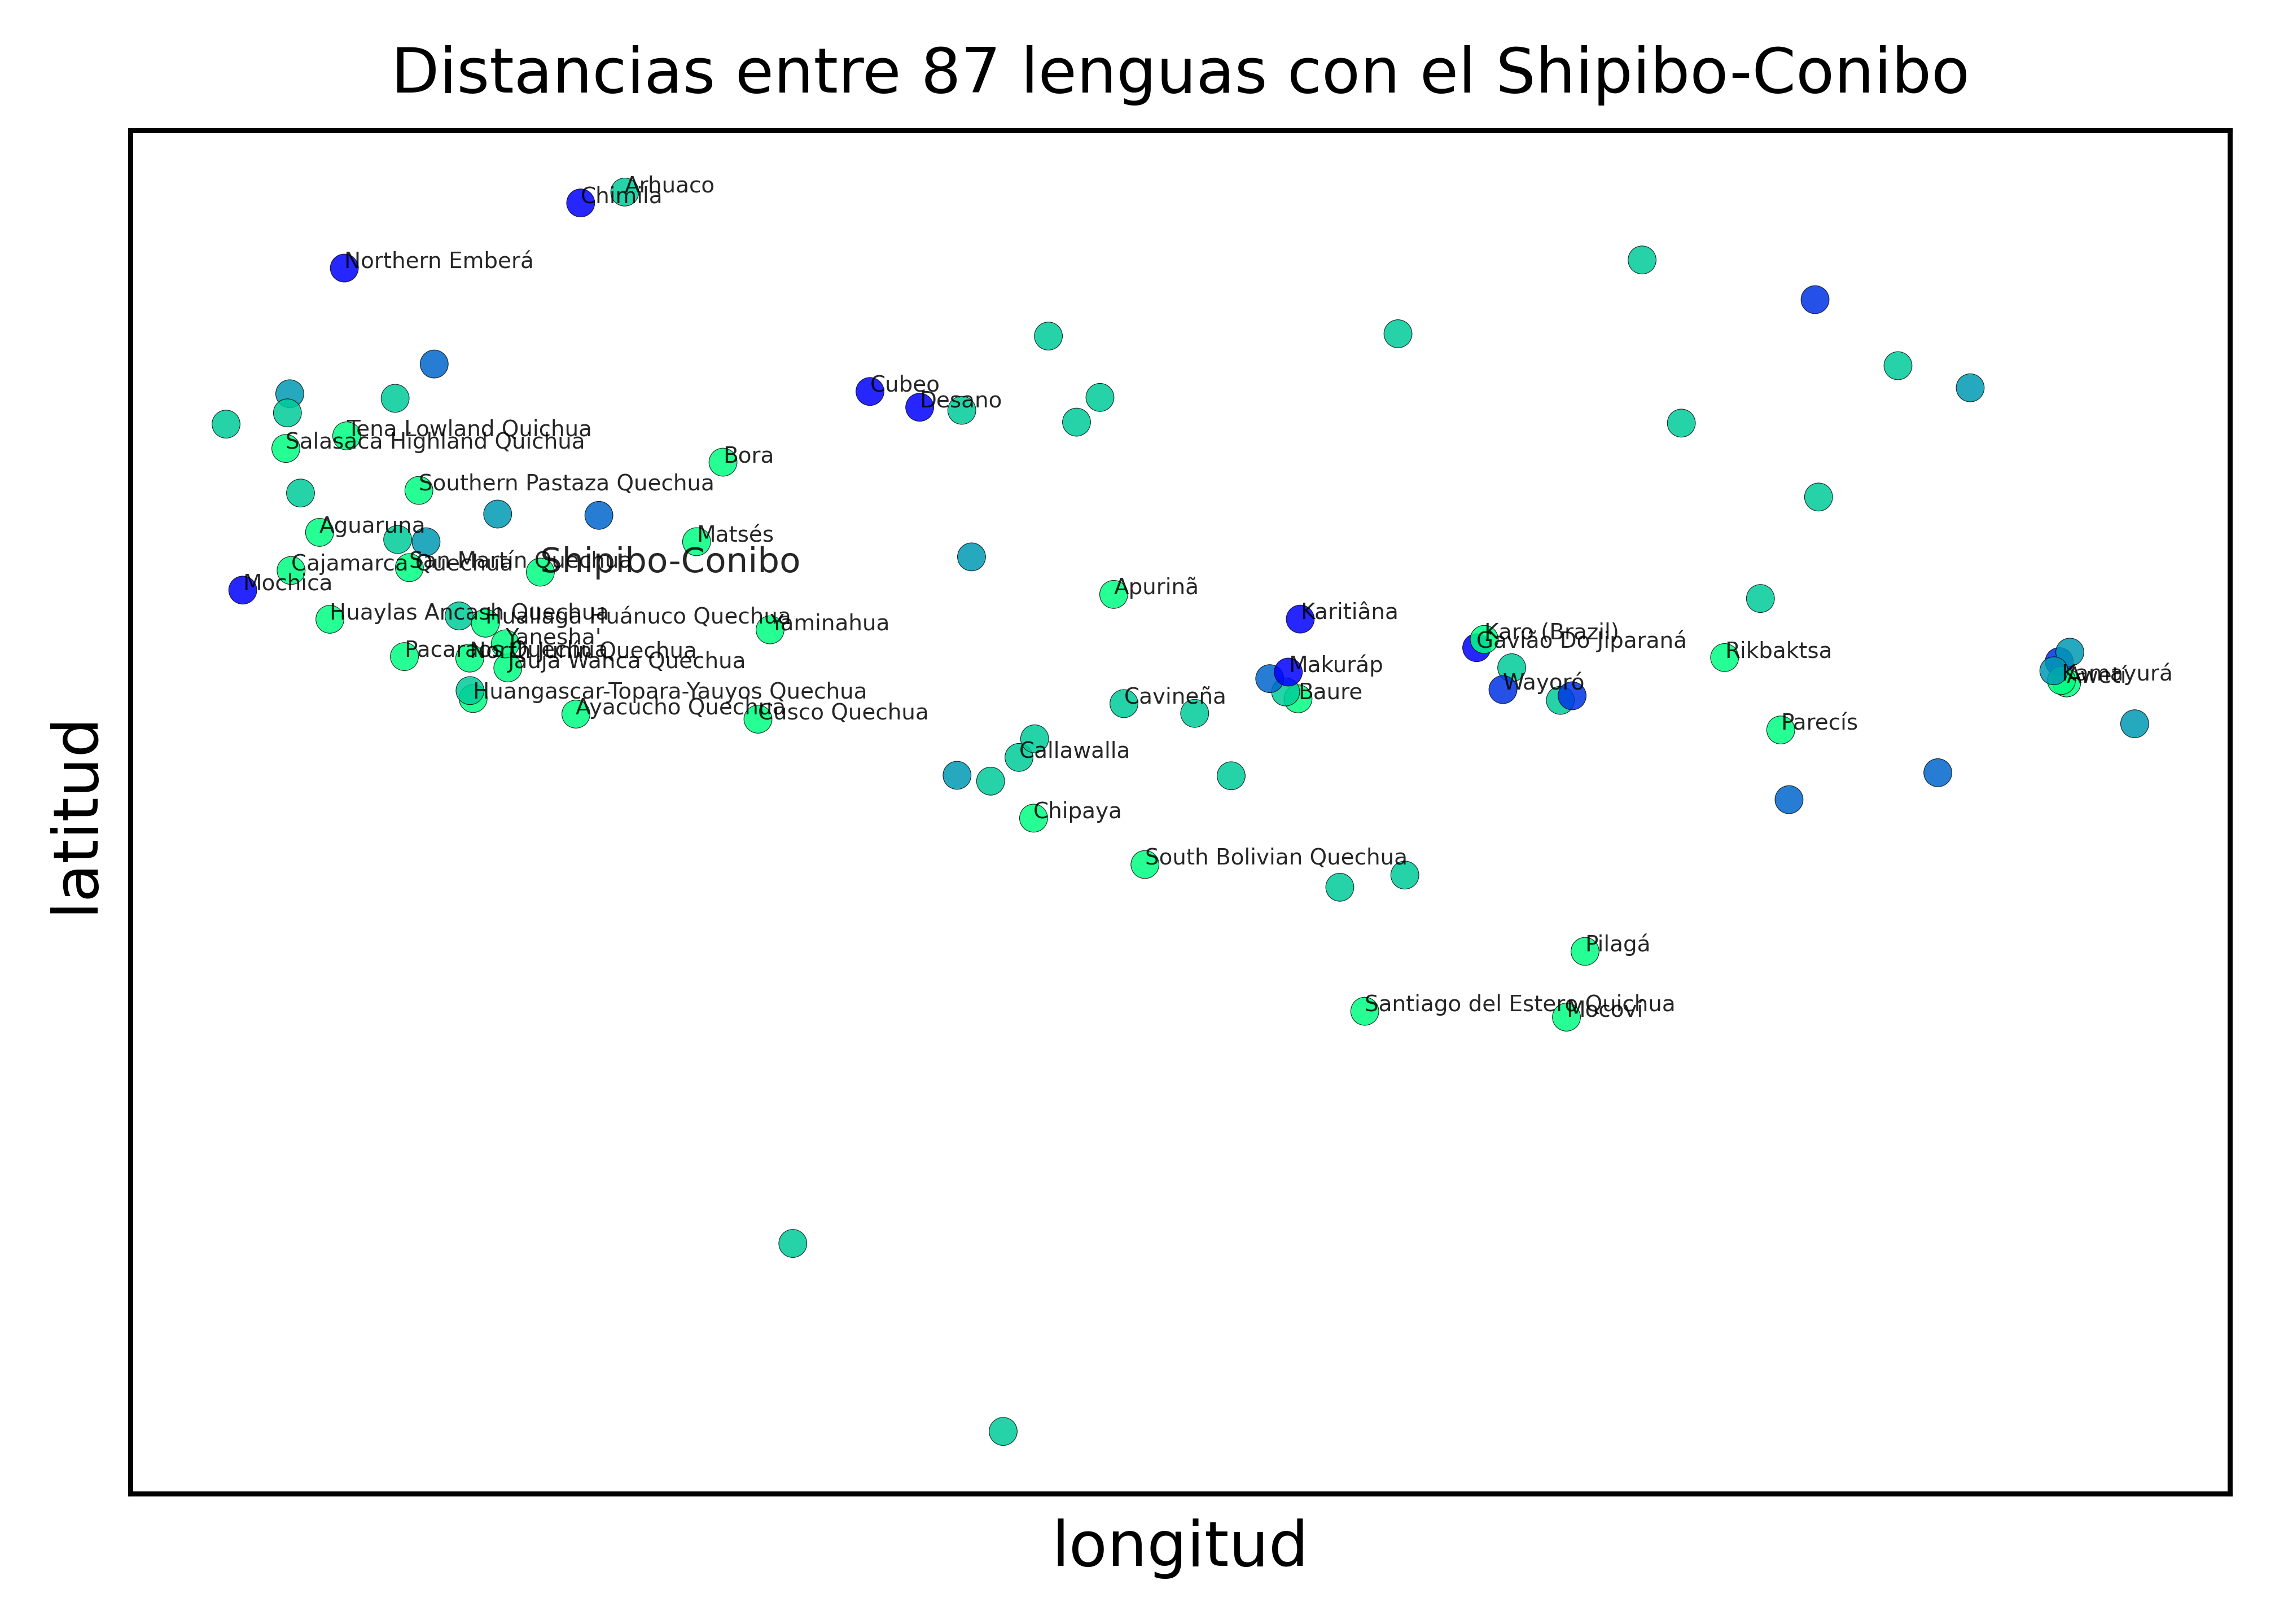

In [248]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

### L= ['Shipibo-Conibo','Matsés', 'Cavineña', 'Yaminahua']

for lengua in list(distancias_ordenadas.keys())[:35]+list(distancias_ordenadas.keys())[-10:]:
    if lengua in dict_lat_lon.keys():
        if lengua == lengua_comp:
            i = list(dict_lat_lon.keys()).index(lengua)
            ax.annotate(lengua, color='k', xy=(X[i]-0.0004,Y[i]-0.0004), fontsize=5.5, alpha=0.85)
        else:
            i = list(dict_lat_lon.keys()).index(lengua)
            ax.annotate(lengua, color='k', xy=(X[i]-0.0004,Y[i]-0.0004), fontsize=3.5, alpha=0.85)

ax.scatter(X,Y,c=[distancias[lengua] for lengua in dict_lat_lon.keys()], s=20, edgecolors='k',linewidths=0.1, cmap=plt.cm.get_cmap('winter').reversed(),alpha=0.85)

plt.grid(False)
plt.title('Distancias entre {}'.format(len(dict_lat_lon)-1)+' lenguas con el {}'.format(lengua_comp),fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'latitud',fontsize=10)
plt.xlabel(r'longitud',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('mapa_distancias.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

En el área de la esquina superior izquierda encontramos una mayor concentración de lenguas cuyas distancias no son completamente distintas, por eso que suelen presentar colores más claros. Teniendo en cuela el SK como lengua base, sus colores no solo se encuentran concentrados en una sola área, sino que están dispersos. Esto indicaría, como se mencionó en las concluiones anteriores, que la marcación de reflexivos y recíprocos por medio de una morfología verbal tiende a ser realizada por una mayoría de lenguas. 

## 6. Visualización 2
### Gráfico (2)

In [249]:
!pip install haversine

In [250]:
from haversine import haversine

In [251]:
distancias_geo_lengua_comp = {}

for lengua in dict_lat_lon.keys():
    distancias_geo_lengua_comp[lengua]=haversine(dict_lat_lon[lengua],dict_lat_lon[lengua_comp])

In [252]:
distancias_geo_lengua_comp

{'Aguaruna': 400.83146270823204,
 'Apalaí': 2427.0933973902384,
 'Apurinã': 894.6814251372724,
 'Arhuaco': 1991.7011279546853,
 'Awa-Cuaiquer': 1011.0404692527259,
 'Awetí': 2417.48173045909,
 'Ayacucho Quechua': 744.3513520041433,
 'Baure': 1339.0571679705242,
 'Bora': 641.3640753607302,
 'Bororo': 2375.849710234742,
 'Cajamarca Quechua': 386.21254790995323,
 'Callawalla': 1213.9377988142369,
 'Cavineña': 1129.462680390653,
 'Central Aymara': 1290.6021717526376,
 'Chimila': 1931.5026399344747,
 'Chipaya': 1488.5184900237139,
 'Cholón': 261.2029879048697,
 'Cocama-Cocamilla': 310.6090734492904,
 'Cubeo': 1075.1247113613078,
 'Cusco Quechua': 838.1318908039005,
 'Desano': 1045.093481025143,
 'Dâw': 1145.506516399844,
 'Gavião Do Jiparaná': 1496.7987093034237,
 'Guató': 2241.355545578733,
 'Hixkaryána': 1939.9961754227454,
 'Huallaga Huánuco Quechua': 280.08917586258724,
 'Huangascar-Topara-Yauyos Quechua': 668.8923422010008,
 'Huaylas Ancash Quechua': 407.95189077827416,
 'Ikpeng': 2385

In [253]:
dict_geo_tip = {}

for lengua in distancias_geo_lengua_comp.keys():
    dict_geo_tip[lengua]=[distancias_geo_lengua_comp[lengua],distancias[lengua]]

In [254]:
dict_geo_tip

{'Aguaruna': [400.83146270823204, 0.0],
 'Apalaí': [2427.0933973902384, 0.4],
 'Apurinã': [894.6814251372724, 0.0],
 'Arhuaco': [1991.7011279546853, 0.2],
 'Awa-Cuaiquer': [1011.0404692527259, 0.4],
 'Awetí': [2417.48173045909, 0.0],
 'Ayacucho Quechua': [744.3513520041433, 0.0],
 'Baure': [1339.0571679705242, 0.0],
 'Bora': [641.3640753607302, 0.0],
 'Bororo': [2375.849710234742, 0.6],
 'Cajamarca Quechua': [386.21254790995323, 0.0],
 'Callawalla': [1213.9377988142369, 0.2],
 'Cavineña': [1129.462680390653, 0.2],
 'Central Aymara': [1290.6021717526376, 0.2],
 'Chimila': [1931.5026399344747, 1.0],
 'Chipaya': [1488.5184900237139, 0.0],
 'Cholón': [261.2029879048697, 0.2],
 'Cocama-Cocamilla': [310.6090734492904, 0.6],
 'Cubeo': [1075.1247113613078, 1.0],
 'Cusco Quechua': [838.1318908039005, 0.0],
 'Desano': [1045.093481025143, 1.0],
 'Dâw': [1145.506516399844, 0.2],
 'Gavião Do Jiparaná': [1496.7987093034237, 1.0],
 'Guató': [2241.355545578733, 0.6],
 'Hixkaryána': [1939.9961754227454

In [255]:
import random

X = [dict_geo_tip[localidad][0] for localidad in dict_geo_tip.keys()]
Y = [dict_geo_tip[localidad][1]+random.random()/50 for localidad in dict_geo_tip.keys()]

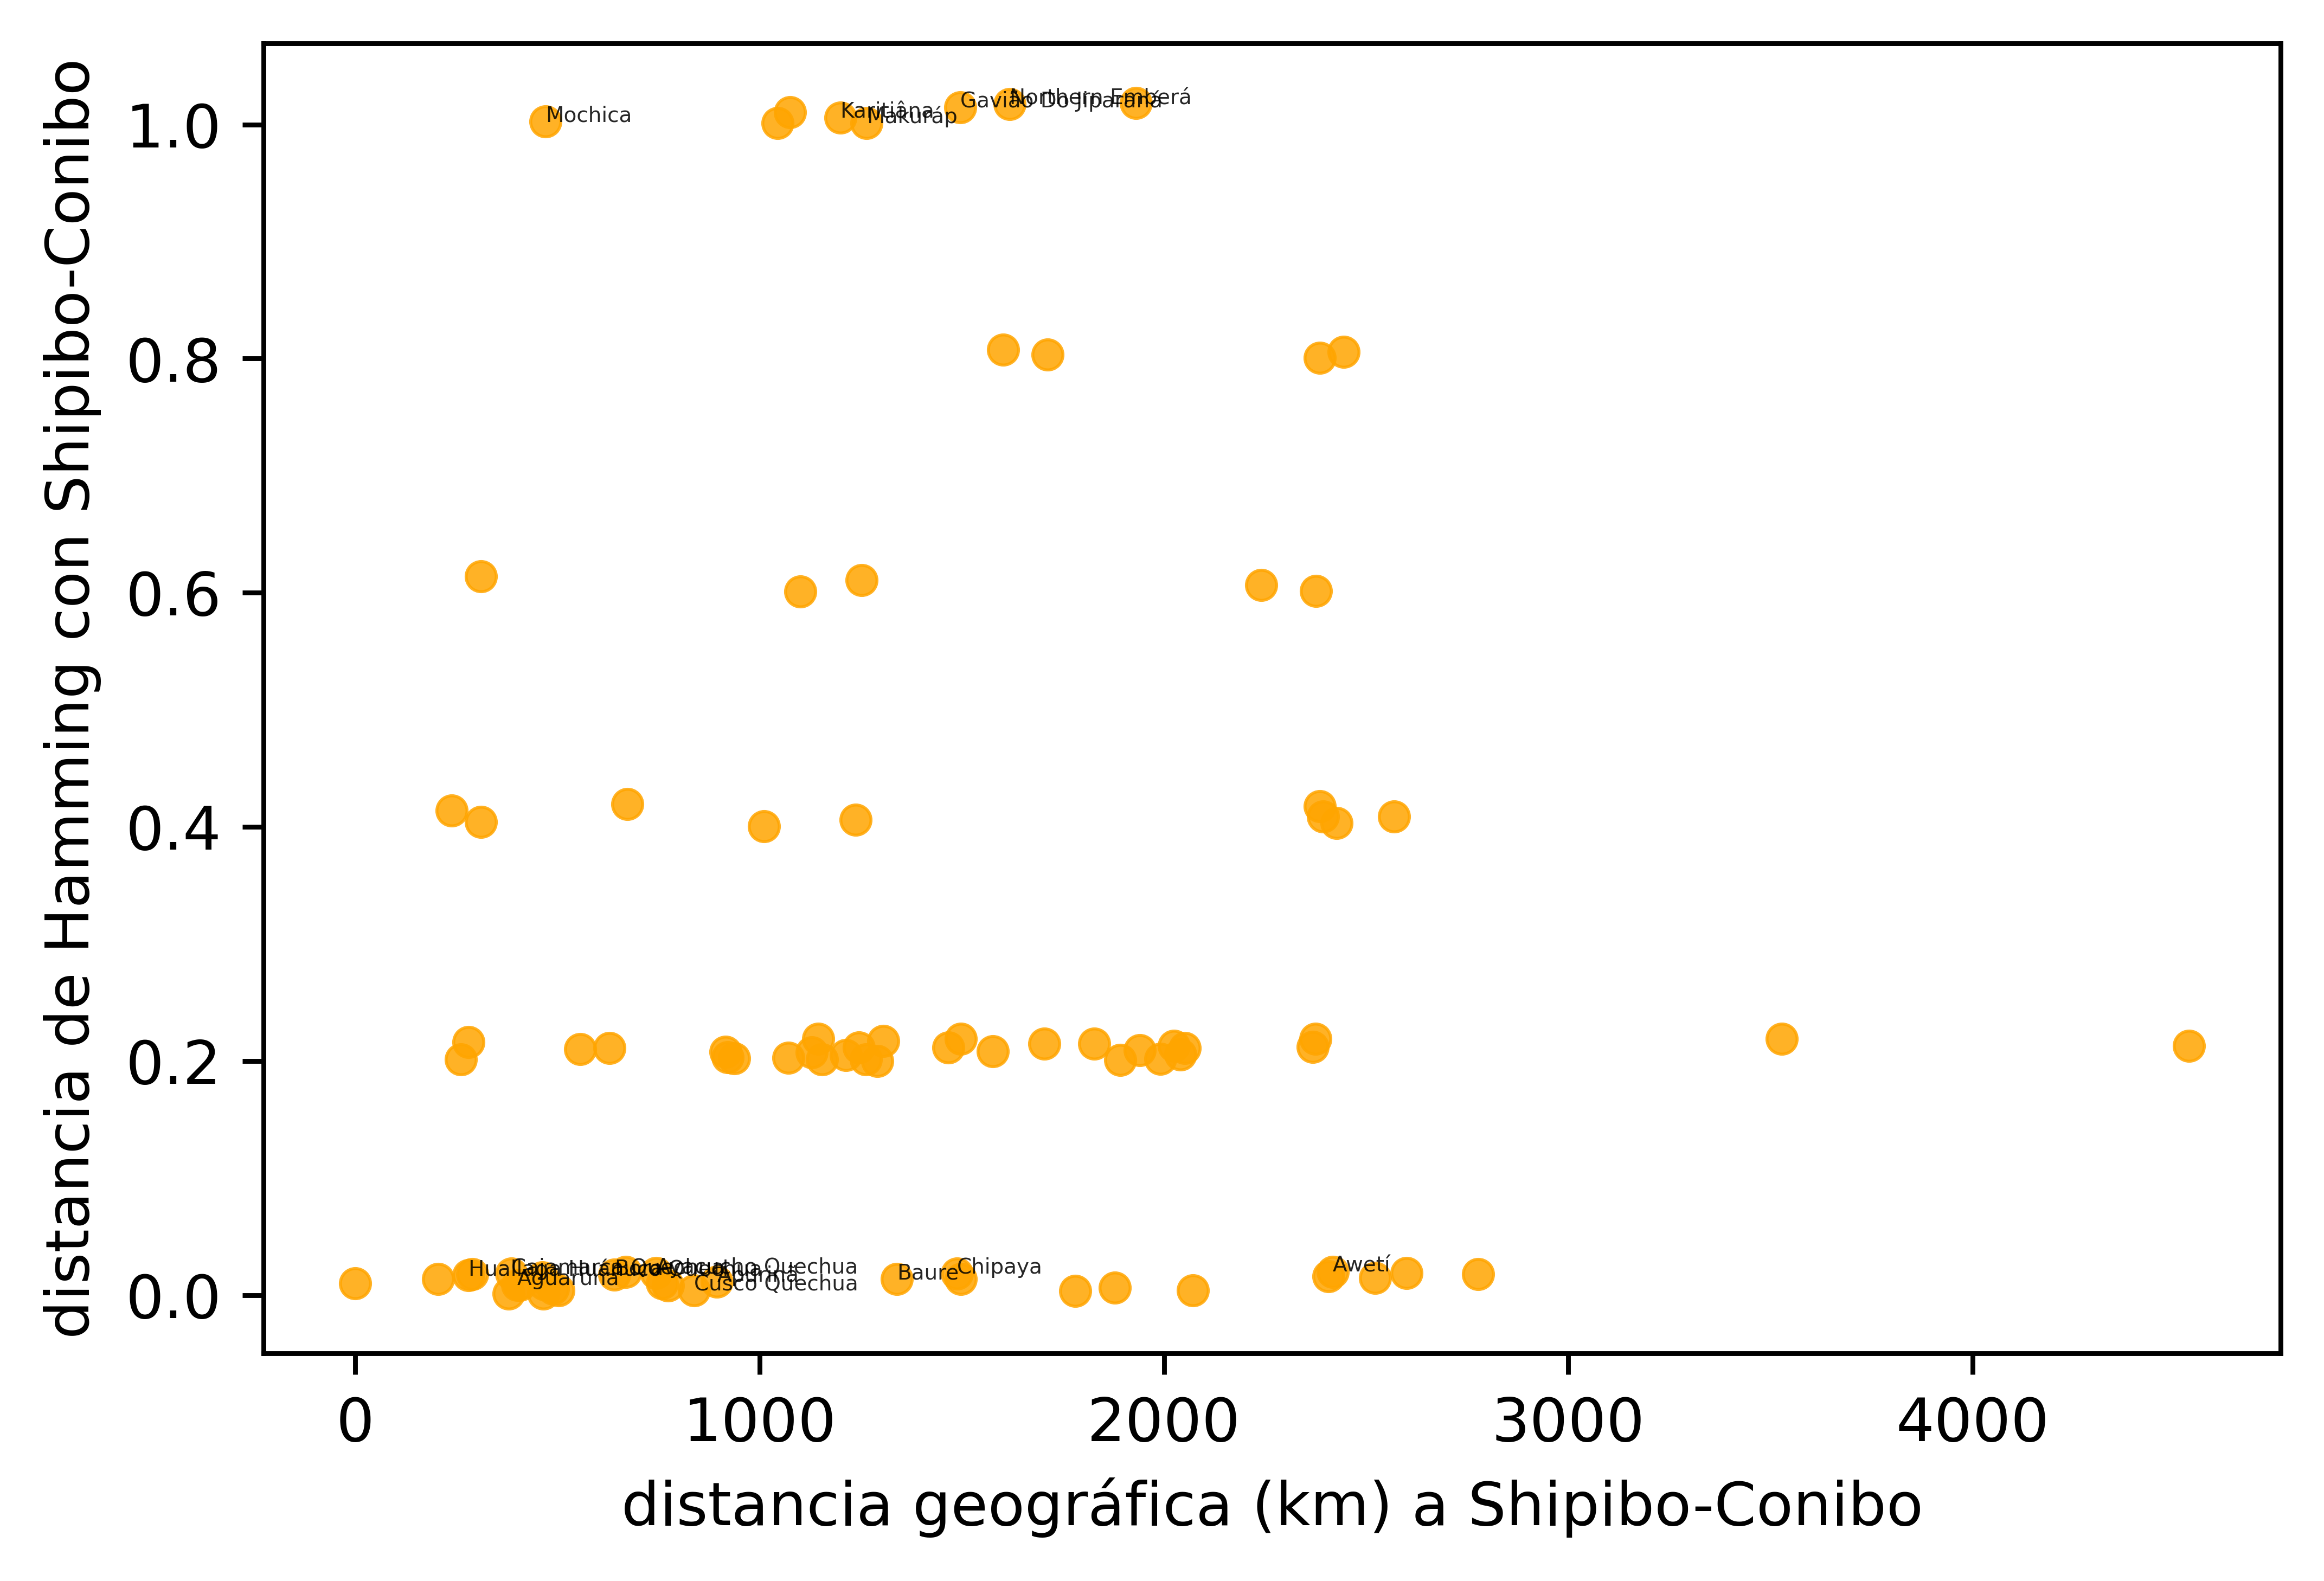

In [256]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)


for lengua in list(distancias_ordenadas.keys())[:10]+list(distancias_ordenadas.keys())[-5:]:
    if lengua in dict_geo_tip.keys():
        i = list(dict_geo_tip.keys()).index(lengua)
        ax.annotate(lengua, color='k', xy=(X[i],Y[i]), fontsize=3.5, alpha=0.85)

ax.plot(X,Y ,marker='o',color='orange',linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'distancia de Hamming con {}'.format(lengua_comp),fontsize=10)
plt.xlabel(r'distancia geográfica (km) a {}'.format(lengua_comp),fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('geo_tip.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()